In [1]:
__author__ = 'Mike Fitzpatrick <fitz@noao.edu>, Glenn Eychaner <geychaner@noao.edu>, Robert Nikutta <nikutta@noao.edu>, Alice Jacques <alice.jacques@noao.edu>'
__version__ = '20200922' # yyyymmdd
__datasets__ = ['sdss_dr14']
__keywords__ = ['vospace','fits']

# How to Use the Data Lab Public File Services

*Revised:  Sept 22, 2020*

### Table of contents
* [Summary](#summary)
* [Disclaimer & Attribution](#attribution)
* [Imports & setup](#import)
* [Listing another user's public file space](#listspace)
* [Listing all available public file spaces](#listall)
* [Example: using the **SDSS DR14** public file service](#exsdss)

<a class="anchor" id="summary"></a>
# Summary

Files in the virtual storage VOSpace are usually identified via the prefix "*vos://*". This shorthand identifier is resolved to a user's home directory of the storage space in the service.  

If the "*vos://*" prefix is instead the name of another user (e.g. "*demo00://*"), and the remainder of the path grants public or group read/write access, then the other user's spaces will be accessed. Most user spaces have a "*/public*" directory to facilitate file sharing (e.g. "*demo00://public/foo.fits*" will access the "*public/foo.fits*" file from user "*demo00*"). Users can make any file (or directory) public by moving it to (or creating a link in) their "/public" directory.

**Public file services** are specially created areas where all files are world-readable, and are used for serving files from Data Lab datasets.

<a class="anchor" id="attribution"></a>
# Disclaimer & Attribution

If you use this notebook for your published science, please acknowledge the following:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://dx.doi.org/10.1117/12.2057445

* Data Lab disclaimer: https://datalab.noao.edu/disclaimers.php

<a class="anchor" id="import"></a>
# Imports & setup

In [2]:
# Make matplotlib plot inline
%matplotlib inline

# Standard DL imports, note we only need storeClient
from dl import storeClient as sc

# 3rd Party Imports
import io
import numpy as np
from matplotlib import pyplot as p
from astropy.io import fits

<a class="anchor" id="listspace"></a>
# Listing another user's public file space
We can view the contents of another user's public file space if we know their username.

In [3]:
print(sc.ls ('demo00://public',format='short'))

test2.csv       test3.csv       test6.csv        



<a class="anchor" id="listall"></a>
# Listing all available public file spaces

A 'file service' is a **public** vospace, readable by all users. The *sc.services()* function allows a user to list all the available file services.

In [4]:
print(sc.services())


                    name   svc   description
                --------   ----  --------
                 chandra   vos   ChaMPlane: Measuring the Faint X-ray Bin ...
             cosmic_dawn   vos   Cosmic DAWN survey
               deeprange   vos   Deeprange Survey
           deep_ecliptic   vos   Deep Ecliptic Survey
                     dls   vos   Deep Lens Survey
                  flamex   vos   FLAMINGOS Extragalactic Survey
                     fls   vos   First Look Survey
                    fsvs   vos   Faint Sky Variability Survey
               ir_bootes   vos   Infrared Bootes Imaging Survey
                     lgs   vos   Local Group Survey
             gogreen_dr1   vos   GOGREEN DR1 Survey
                     lmc   vos   SuperMACHO Survey
                  ls_dr1   vos   DECam Legacy Survey DR1
                  ls_dr2   vos   DECam Legacy Survey DR2
                  ls_dr3   vos   DECam Legacy Survey DR3
                  ls_dr4   vos   DECam Legacy Survey DR4
    

<a class="anchor" id="exsdss"></a>

# An example using the **SDSS DR14** public file service.

We can explore the contents of a particular public file space using the *sc.ls* function:  

In [5]:
print(sc.ls('sdss_dr14://'))

apo,apogee,eboss,env,manga,marvels,sdss


We can delve deeper into a particular file by specifying the file name when we call the *sc.ls* function:

In [6]:
print(sc.ls ('sdss_dr14://eboss'))

calib,elg,lss,lya,photo,photoObj,qso,resolve,spectro,spiders,sweeps,target


In [7]:
print(sc.ls ('sdss_dr14://eboss/spectro/'))

data,firefly,redux


In [8]:
print(sc.ls ('sdss_dr14://eboss/spectro/redux',format='long'))

drw-rw----  sdss_dr14       0  14 Sep 2020 09:01  images
lrw-rw----  sdss_dr14       0  14 Sep 2020 09:01  platelist-mjdsort.html
lrw-rw----  sdss_dr14       0  14 Sep 2020 09:01  platelist-mjdsort.txt
lrw-rw----  sdss_dr14       0  14 Sep 2020 09:01  platelist.fits
lrw-rw----  sdss_dr14       0  14 Sep 2020 09:01  platelist.html
lrw-rw----  sdss_dr14       0  14 Sep 2020 09:01  platelist.txt
lrw-rw----  sdss_dr14       0  14 Sep 2020 09:01  platequality-mjdsort.html
lrw-rw----  sdss_dr14       0  14 Sep 2020 09:01  platequality-mjdsort.txt
lrw-rw----  sdss_dr14       0  14 Sep 2020 09:01  platequality.html
lrw-rw----  sdss_dr14       0  14 Sep 2020 09:01  platequality.txt
drw-rw----  sdss_dr14       0  14 Sep 2020 09:01  redmonster
drw-rw----  sdss_dr14       0  14 Sep 2020 09:01  v5_10_0



### Set base directory and plate number
We can set the base directory and plate number of the object we want to look at:

In [9]:
base = 'sdss_dr14://eboss/spectro/redux/v5_10_0/'
plate = '3615'

### List all available FITS plate files in the plate directory
We can construct the VOSpace path to the plate directory:

In [10]:
spPlate = base + plate + '/spPlate-' + plate
print(sc.ls (spPlate + '*.fits', format='short'))

spPlate-3615-55179.fits  spPlate-3615-55208.fits  spPlate-3615-55445.fits
spPlate-3615-55856.fits  spPlate-3615-56219.fits  spPlate-3615-56544.fits



### Pick a modified Julian date (mjd) and fiber
With the mjd, we can construct the VOSpace path to the plate file. We then verify the path construction.

In [11]:
mjd = '56544'
fiber = 39

spfile = spPlate + '-' + mjd + '.fits'
print ('File: ' + spfile)
print (sc.ls (spfile))

File: sdss_dr14://eboss/spectro/redux/v5_10_0/3615/spPlate-3615-56544.fits
spPlate-3615-56544.fits


### Now read the spectrum from the file and construct the wavelength array
From this file we will also retrieve its header, flux, and inverse variance. 

In [12]:
try:
    with fits.open(sc.get(spfile, mode='fileobj')) as hdulist:
        hdr = hdulist[0].header
        flux = hdulist[0].data[fiber-1, :]
        ivar = hdulist[1].data[fiber-1, :]
except Exception as e:
    raise ValueError("Could not find spPlate file for plate={0:s}, mjd={1:s}!".format(plate, mjd))

loglam = hdr['COEFF0'] + hdr['COEFF1']*np.arange(hdr['NAXIS1'], dtype=flux.dtype)
wavelength = 10.0**loglam
print("Length of wavelength array =", len(wavelength))
print("Length of flux array =", len(flux))
print("Length of ivar array =", len(ivar))

Length of wavelength array = 4645
Length of flux array = 4645
Length of ivar array = 4645


### Make a plot of the spectrum
Here we plot the wavelength and ivar-corrected flux.

Text(0, 0.5, 'Flux')

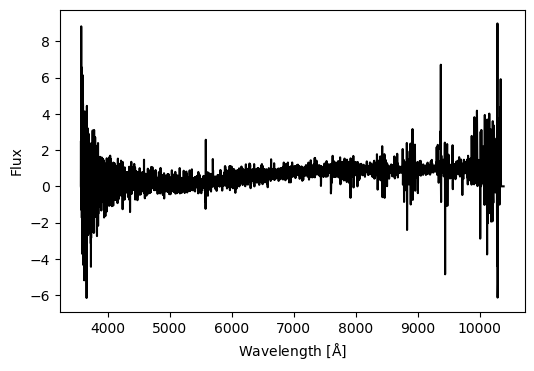

In [13]:
fig = p.figure(dpi=100)
p.plot(wavelength, flux* (ivar > 0), 'k')
p.xlabel('Wavelength [$\mathrm{\AA}$]')
p.ylabel('Flux')